Import libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, average_precision_score

Load data

In [4]:
df_dev = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

Split data into train, val and test

In [5]:
# Development set
y_dev = df_dev['loan_status']
df_dev.drop('loan_status', axis=1, inplace=True)

# Train and validation set with a stratified split
X_train, X_val, y_train, y_val = train_test_split(df_dev, y_dev, test_size=0.2, random_state=42, stratify=y_dev)

# Test set
y_test = df_test['loan_status']
X_test = df_test.drop('loan_status', axis=1)

Creating Sampled data

In [12]:
def sampling(X, y, sampler):
    X_samp, y_samp = sampler.fit_resample(X, y)
    print('Original shape: ', X.shape)
    print('Sampled shape: ', X_samp.shape)
    print('Class distribution after sampling : ', y_samp.value_counts())
    return X_samp, y_samp

In [10]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

Random Oversampling Data

In [13]:
X_train_ros, y_train_ros = sampling(X_train, y_train, ros)

Original shape:  (207088, 39)
Sampled shape:  (333562, 39)
Class distribution after sampling :  loan_status
0    166781
1    166781
Name: count, dtype: int64


Random Undersampling Data

In [14]:
X_train_rus, y_train_rus = sampling(X_train, y_train, rus)

Original shape:  (207088, 39)
Sampled shape:  (80614, 39)
Class distribution after sampling :  loan_status
0    40307
1    40307
Name: count, dtype: int64


SMOTE Data

In [15]:
X_train_smote, y_train_smote = sampling(X_train, y_train, smote)

Original shape:  (207088, 39)
Sampled shape:  (333562, 39)
Class distribution after sampling :  loan_status
0    166781
1    166781
Name: count, dtype: int64


Helper functions for Accuracy, Precision, Recall, F1, AUC-ROC, AUPR

In [38]:
def val_metrics(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    print('Train Accuracy', model.score(X_train, y_train))
    print('Validation Accuracy', model.score(X_val, y_val))
    print('Validation F1 score', f1_score(y_val, y_pred, pos_label=1))
    print('Validation Precision score', precision_score(y_val, y_pred, pos_label=1))
    print('Validation Recall score', recall_score(y_val, y_pred, pos_label=1))
    print('Validation ROC AUC score', roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))
    print('Validation Average Precision score', average_precision_score(y_val, model.predict_proba(X_val)[:,1]))

In [71]:
def test_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Test Accuracy', model.score(X_test, y_test))
    print('Test F1 score', f1_score(y_test, y_pred, pos_label=1))
    print('Test Precision score', precision_score(y_test, y_pred, pos_label=1))
    print('Test Recall score', recall_score(y_test, y_pred, pos_label=1))
    print('Test ROC AUC score', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print('Test Average Precision score', average_precision_score(y_test, model.predict_proba(X_test)[:,1]))

Decision Tree baseline model

In [52]:
dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train, y_train)

val_metrics(dt_baseline, X_train, y_train, X_val, y_val)

Train Accuracy 1.0
Validation Accuracy 0.7081820288959283
Validation F1 score 0.28063993905342344
Validation Precision score 0.2697482837528604
Validation Recall score 0.29244814925076906
Validation ROC AUC score 0.5505531308671402
Validation Average Precision score 0.21660661681916518


Decision Tree Random Oversampling model

In [53]:
ros_dt = DecisionTreeClassifier(random_state=42)
scores = cross_validate(ros_dt, X_train_ros, y_train_ros, cv=5, scoring= ['roc_auc', 'average_precision', 'f1', 'precision', 'recall', 'accuracy'])

print('Accuracy score of the baseline model with Oversampling: ', scores['test_accuracy'].mean())
print('F1 score of the baseline model with Oversampling: ', scores['test_f1'].mean())
print('Precision score of the baseline model with Oversampling: ', scores['test_precision'].mean())
print('Recall score of the baseline model with Oversampling: ', scores['test_recall'].mean())
print('AUC of the baseline model with Oversampling: ', scores['test_roc_auc'].mean())
print('Average Precision of the baseline model with Oversampling: ', scores['test_average_precision'].mean())

Accuracy score of the baseline model with Oversampling:  0.8899575286391931
F1 score of the baseline model with Oversampling:  0.8999455682333378
Precision score of the baseline model with Oversampling:  0.8248406222024828
Recall score of the baseline model with Oversampling:  0.9901668070856164
AUC of the baseline model with Oversampling:  0.8899575184278954
Average Precision of the baseline model with Oversampling:  0.8216595199205298


Decision Tree Random Undersampling model

In [55]:
rus_dt = DecisionTreeClassifier(random_state=42)
scores = cross_validate(rus_dt, X_train_rus, y_train_rus, cv=5, scoring= ['roc_auc', 'average_precision', 'f1', 'precision', 'recall', 'accuracy'])

print('Accuracy score of the baseline model with Undersampling: ', scores['test_accuracy'].mean())
print('F1 score of the baseline model with Undersampling: ', scores['test_f1'].mean())
print('Precision score of the baseline model with Undersampling: ', scores['test_precision'].mean())
print('Recall score of the baseline model with Undersampling: ', scores['test_recall'].mean())
print('AUC of the baseline model with Undersampling: ', scores['test_roc_auc'].mean())
print('Average Precision of the baseline model with Undersampling: ', scores['test_average_precision'].mean())

Accuracy score of the baseline model with Undersampling:  0.5640335576809535
F1 score of the baseline model with Undersampling:  0.5639430227815376
Precision score of the baseline model with Undersampling:  0.5640232584973333
Recall score of the baseline model with Undersampling:  0.5638974199796509
AUC of the baseline model with Undersampling:  0.5640337194459107
Average Precision of the baseline model with Undersampling:  0.5361265260689996


Decision Tree SMOTE model

In [56]:
smote_dt = DecisionTreeClassifier(random_state=42)
scores = cross_validate(smote_dt, X_train_smote, y_train_smote, cv=5, scoring= ['roc_auc', 'average_precision', 'f1', 'precision', 'recall', 'accuracy'])

print('Accuracy score of the baseline model with SMOTE: ', scores['test_accuracy'].mean())
print('F1 score of the baseline model with SMOTE: ', scores['test_f1'].mean())
print('Precision score of the baseline model with SMOTE: ', scores['test_precision'].mean())
print('Recall score of the baseline model with SMOTE: ', scores['test_recall'].mean())
print('AUC of the baseline model with SMOTE: ', scores['test_roc_auc'].mean())
print('Average Precision of the baseline model with SMOTE: ', scores['test_average_precision'].mean())

Accuracy score of the baseline model with SMOTE:  0.7900697249612263
F1 score of the baseline model with SMOTE:  0.7365868550919636
Precision score of the baseline model with SMOTE:  0.7704285117262997
Recall score of the baseline model with SMOTE:  0.7767727762551091
AUC of the baseline model with SMOTE:  0.790068478769449
Average Precision of the baseline model with SMOTE:  0.7327202868376084


The Decision Tree model with Random Oversampling performs the best here!

Decision Tree Hyperparameter tuning with best sampling model

In [76]:
ros_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                  param_grid=[{'max_depth': np.arange(1,15)}], cv=StratifiedKFold(n_splits=5, shuffle=False))

ros_dt.fit(X_train_ros, y_train_ros)

print("Best hyperparameters:", ros_dt.best_params_)
print("Mean cross-validated score with best hyperparameters:", ros_dt.best_score_)

Best hyperparameters: {'max_depth': 14}
Mean cross-validated score with best hyperparameters: 0.7078924034952442


Decision Tree Hyperparameter tuning with baseline model

In [77]:
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                  param_grid=[{'max_depth': np.arange(1,15)}], cv=StratifiedKFold(n_splits=5, shuffle=False))

dt.fit(X_train, y_train)

print("Best hyperparameters:", dt.best_params_)
print("Mean cross-validated score with best hyperparameters:", dt.best_score_)

Best hyperparameters: {'max_depth': 7}
Mean cross-validated score with best hyperparameters: 0.8059907003908956


Decision Tree model with best hyperparameters

In [78]:
dt_best = DecisionTreeClassifier(max_depth=dt.best_params_['max_depth'], random_state=42)
dt_best.fit(X_train, y_train)

val_metrics(dt_best, X_train, y_train, X_val, y_val)

Train Accuracy 0.8079753534729197
Validation Accuracy 0.8045468593061886
Validation F1 score 0.11306863002892455
Validation Precision score 0.48423423423423423
Validation Recall score 0.06400714498362609
Validation ROC AUC score 0.6947318252882473
Validation Average Precision score 0.33955507803126


In [42]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': dt_best.feature_importances_})
feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance.head(10)

,feature,importance
3,int_rate,0.671235
2,term,0.113235
6,dti,0.083245
5,annual_inc,0.053581
11,mort_acc,0.022660
9,revol_util,0.013723
1,loan_amnt,0.010358
18,Not Verified,0.007552
14,MORTGAGE,0.007199
8,revol_bal,0.004013


Feature Importance of the Decision Tree model

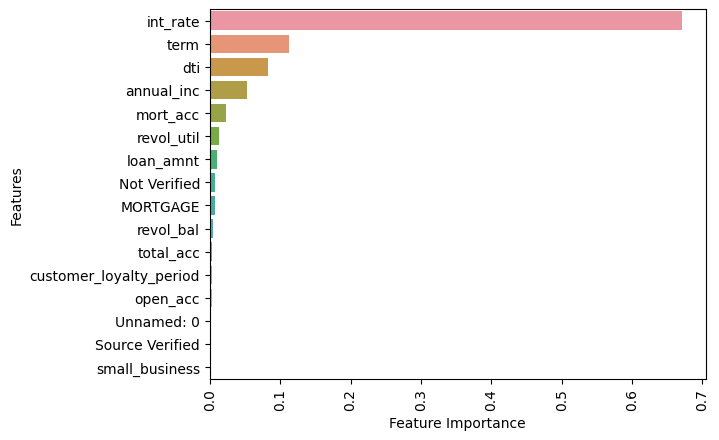

In [79]:
fimps = list(zip(X_train.columns, dt_best.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] !=0, fimps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(x=list(imps), y=list(feats))
ax.set_ylabel("Features")
ax.set_xlabel("Feature Importance")
ax.tick_params(axis='x', rotation=90)

Decision Tree prediction on test set with best model and Condusion Matrix

In [80]:
test_metrics(dt_best, X_test, y_test)

Test Accuracy 0.8063814022413633
Test F1 score 0.11612994151222607
Test Precision score 0.5067650676506765
Test Recall score 0.06557898925586948
Test ROC AUC score 0.6987139460362541
Test Average Precision score 0.34688208388703673


Text(0.5, 1.0, 'Confusion Matrix of the Decision Tree Model')

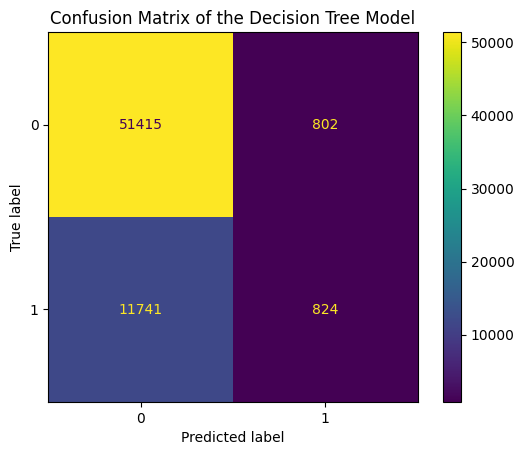

In [81]:
ConfusionMatrixDisplay.from_estimator(dt_best, X_test, y_test)
plt.title('Confusion Matrix of the Decision Tree Model')

RANDOM FOREST

Random Forest baseline

In [23]:
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

val_metrics(rf_baseline, X_train, y_train, X_val, y_val)

Train Accuracy 0.9999855134049294
Validation Accuracy 0.8060727806536352
Validation F1 score 0.11118980169971673
Validation Precision score 0.5151763740771124
Validation Recall score 0.062320134960801826
Validation ROC AUC score 0.6968764449462844
Validation Average Precision score 0.34775841645509015


Random Forest Random Oversampling model

In [49]:
ros_rf = RandomForestClassifier(random_state=42)
scores = cross_validate(ros_rf, X_train_ros, y_train_ros, cv=5, scoring= ['roc_auc', 'average_precision', 'f1', 'precision', 'recall', 'accuracy'])

print('Accuracy score of the baseline model with Oversampling: ', scores['test_accuracy'].mean())
print('F1 score of the baseline model with Oversampling: ', scores['test_f1'].mean())
print('Precision score of the baseline model with Oversampling: ', scores['test_precision'].mean())
print('Recall score of the baseline model with Oversampling: ', scores['test_recall'].mean())
print('AUC of the baseline model with Oversampling: ', scores['test_roc_auc'].mean())
print('Average Precision of the baseline model with Oversampling: ', scores['test_average_precision'].mean())

Accuracy score of the baseline model with Oversampling:  0.9618931845605102
F1 score of the baseline model with Oversampling:  0.9628419187283994
Precision score of the baseline model with Oversampling:  0.9383173115000751
Recall score of the baseline model with Oversampling:  0.9888057408847585
AUC of the baseline model with Oversampling:  0.9956865834120034
Average Precision of the baseline model with Oversampling:  0.9968662815261744


Random Forest Random Undersampling model

In [50]:
rus_rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rus_rf, X_train_rus, y_train_rus, cv=5, scoring= ['roc_auc', 'average_precision', 'f1', 'precision', 'recall', 'accuracy'])

print('Accuracy score of the baseline model with Undersampling: ', scores['test_accuracy'].mean())
print('F1 score of the baseline model with Undersampling: ', scores['test_f1'].mean())
print('Precision score of the baseline model with Undersampling: ', scores['test_precision'].mean())
print('Recall score of the baseline model with Undersampling: ', scores['test_recall'].mean())
print('AUC of the baseline model with Undersampling: ', scores['test_roc_auc'].mean())
print('Average Precision of the baseline model with Undersampling: ', scores['test_average_precision'].mean())

Accuracy score of the baseline model with Undersampling:  0.6470960498487072
F1 score of the baseline model with Undersampling:  0.6476898339300478
Precision score of the baseline model with Undersampling:  0.6466213808519693
Recall score of the baseline model with Undersampling:  0.6487957567162393
AUC of the baseline model with Undersampling:  0.701017114242111
Average Precision of the baseline model with Undersampling:  0.6769715343449718


Random Forest SMOTE model

In [51]:
smote_rf = RandomForestClassifier(random_state=42)
scores = cross_validate(smote_rf, X_train_smote, y_train_smote, cv=5, scoring= ['roc_auc', 'average_precision', 'f1', 'precision', 'recall', 'accuracy'])

print('Accuracy score of the baseline model with SMOTE: ', scores['test_accuracy'].mean())
print('F1 score of the baseline model with SMOTE: ', scores['test_f1'].mean())
print('Precision score of the baseline model with SMOTE: ', scores['test_precision'].mean())
print('Recall score of the baseline model with SMOTE: ', scores['test_recall'].mean())
print('AUC of the baseline model with SMOTE: ', scores['test_roc_auc'].mean())
print('Average Precision of the baseline model with SMOTE: ', scores['test_average_precision'].mean())

Accuracy score of the baseline model with SMOTE:  0.8652194693419336
F1 score of the baseline model with SMOTE:  0.7639976308303552
Precision score of the baseline model with SMOTE:  0.9643351367174453
Recall score of the baseline model with SMOTE:  0.7570403693075722
AUC of the baseline model with SMOTE:  0.9267404863659564
Average Precision of the baseline model with SMOTE:  0.9269435027498307


The Random Forest model with Random Oversampling performs best here!

Random Forest Hyperparameter Tuning with baseline model

In [60]:
rf = GridSearchCV(RandomForestClassifier(random_state=42, oob_score=True),
                    param_grid=[{'n_estimators': [50, 80, 100, 120, 150], 'min_samples_split': [2, 3, 4, 5, 6]}],
                    cv=StratifiedKFold(n_splits=5, shuffle=False))
rf.fit(X_train, y_train)

print("Best hyperparameters:", rf.best_params_)
print("Mean cross-validated score with best hyperparameters:", rf.best_score_)
print("OOB score:", rf.best_estimator_.oob_score_)

Best hyperparameters: {'min_samples_split': 5, 'n_estimators': 150}
Mean cross-validated score with best hyperparameters: 0.8076228477683214
OOB score: 0.8064590898555204


Random Forest Hyperparameter tuning with best sampling model

In [65]:
ros_rf = GridSearchCV(RandomForestClassifier(random_state=42, oob_score=True),
                    param_grid=[{'n_estimators': [50, 80, 100, 120, 150], 'min_samples_split': [2, 3, 4, 5, 6]}],
                    cv=StratifiedKFold(n_splits=5, shuffle=False))
ros_rf.fit(X_train_ros, y_train_ros)

print("Best hyperparameters:", ros_rf.best_params_)
print("Mean cross-validated score with best hyperparameters:", ros_rf.best_score_)
print("OOB score:", ros_rf.best_estimator_.oob_score_)

Best hyperparameters: {'min_samples_split': 2, 'n_estimators': 150}
Mean cross-validated score with best hyperparameters: 0.9625587260114802
OOB score: 0.9729105833398288


Best Random Forest model

In [66]:
rf_best = RandomForestClassifier(n_estimators=ros_rf.best_params_['n_estimators'], min_samples_split=ros_rf.best_params_['min_samples_split'], random_state=42, oob_score=True)
rf_best.fit(X_train_ros, y_train_ros)

print("OOB score:", rf_best.oob_score_)
val_metrics(rf_best, X_train_ros, y_train_ros, X_val, y_val)

OOB score: 0.9729105833398288
Train Accuracy 1.0
Validation Accuracy 0.7990226377192304
Validation F1 score 0.21619585687382295
Validation Precision score 0.44871794871794873
Validation Recall score 0.14240349310310607
Validation ROC AUC score 0.7001961262352318
Validation Average Precision score 0.3475831947714384


Random Forest Feature Importance

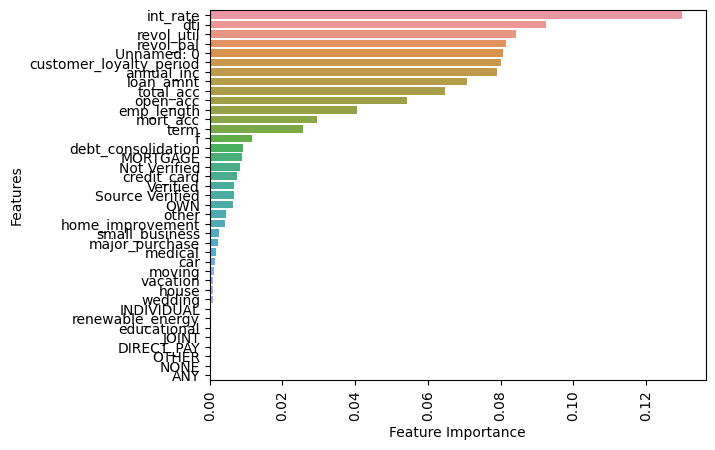

In [82]:
fimps = list(zip(X_train.columns, rf_best.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] !=0, fimps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(x=list(imps), y=list(feats))
ax.set_ylabel("Features")
ax.set_xlabel("Feature Importance")
ax.tick_params(axis='x', rotation=90)

Random Forest prediction on test set with best model and Condusion Matrix

In [83]:
test_metrics(rf_best, X_test, y_test)

Test Accuracy 0.8032941249112407
Test F1 score 0.21431654232690053
Test Precision score 0.4756431308155446
Test Recall score 0.1383207321925985
Test ROC AUC score 0.7043834218068876
Test Average Precision score 0.355275490175097


Text(0.5, 1.0, 'Confusion Matrix of the Random Forest Model')

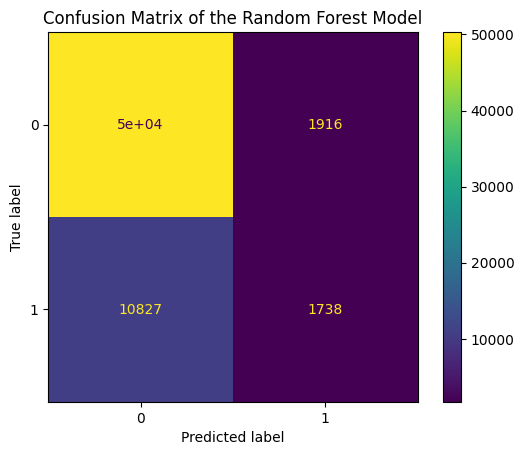

In [84]:
ConfusionMatrixDisplay.from_estimator(rf_best, X_test, y_test)
plt.title('Confusion Matrix of the Random Forest Model')

XGBOOST

XGBoost Baseline model

In [61]:
xgb_baseline = XGBClassifier(random_state=42)
xgb_baseline.fit(X_train, y_train)

val_metrics(xgb_baseline, X_train, y_train, X_val, y_val)

Train Accuracy 0.8205304025341884
Validation Accuracy 0.8060534651935409
Validation F1 score 0.14971631806249472
Validation Precision score 0.5103926096997691
Validation Recall score 0.08772452118686117
Validation ROC AUC score 0.7091995805460207
Validation Average Precision score 0.36230808838732254


XGBoost Random Oversampling model

In [62]:
ros_xgb = XGBClassifier(random_state=42)
scores = cross_validate(ros_xgb, X_train_ros, y_train_ros, cv=5, scoring= ['roc_auc', 'average_precision', 'f1', 'precision', 'recall', 'accuracy'])

print('Accuracy score of the baseline model with Oversampling: ', scores['test_accuracy'].mean())
print('F1 score of the baseline model with Oversampling: ', scores['test_f1'].mean())
print('Precision score of the baseline model with Oversampling: ', scores['test_precision'].mean())
print('Recall score of the baseline model with Oversampling: ', scores['test_recall'].mean())
print('AUC of the baseline model with Oversampling: ', scores['test_roc_auc'].mean())
print('Average Precision of the baseline model with Oversampling: ', scores['test_average_precision'].mean())

Accuracy score of the baseline model with Oversampling:  0.6981700629382881
F1 score of the baseline model with Oversampling:  0.7047773256761054
Precision score of the baseline model with Oversampling:  0.6896690362611705
Recall score of the baseline model with Oversampling:  0.720573680371311
AUC of the baseline model with Oversampling:  0.7684998329493165
Average Precision of the baseline model with Oversampling:  0.7467182137739925


XGBoost Random Undersampling model

In [63]:
rus_xgb = XGBClassifier(random_state=42)
scores = cross_validate(rus_xgb, X_train_rus, y_train_rus, cv=5, scoring= ['roc_auc', 'average_precision', 'f1', 'precision', 'recall', 'accuracy'])

print('Accuracy score of the baseline model with Undersampling: ', scores['test_accuracy'].mean())
print('F1 score of the baseline model with Undersampling: ', scores['test_f1'].mean())
print('Precision score of the baseline model with Undersampling: ', scores['test_precision'].mean())
print('Recall score of the baseline model with Undersampling: ', scores['test_recall'].mean())
print('AUC of the baseline model with Undersampling: ', scores['test_roc_auc'].mean())
print('Average Precision of the baseline model with Undersampling: ', scores['test_average_precision'].mean())

Accuracy score of the baseline model with Undersampling:  0.64759230928673
F1 score of the baseline model with Undersampling:  0.6503404190437824
Precision score of the baseline model with Undersampling:  0.6453484616475753
Recall score of the baseline model with Undersampling:  0.6554445664878977
AUC of the baseline model with Undersampling:  0.7031739346734952
Average Precision of the baseline model with Undersampling:  0.6842085868845732


XGBoost SMOTE model

In [64]:
smote_xgb = XGBClassifier(random_state=42)
scores = cross_validate(smote_xgb, X_train_smote, y_train_smote, cv=5, scoring= ['roc_auc', 'average_precision', 'f1', 'precision', 'recall', 'accuracy'])

print('Accuracy score of the baseline model with SMOTE: ', scores['test_accuracy'].mean())
print('F1 score of the baseline model with SMOTE: ', scores['test_f1'].mean())
print('Precision score of the baseline model with SMOTE: ', scores['test_precision'].mean())
print('Recall score of the baseline model with SMOTE: ', scores['test_recall'].mean())
print('AUC of the baseline model with SMOTE: ', scores['test_roc_auc'].mean())
print('Average Precision of the baseline model with SMOTE: ', scores['test_average_precision'].mean())

Accuracy score of the baseline model with SMOTE:  0.8664336397488073
F1 score of the baseline model with SMOTE:  0.7653633993378974
Precision score of the baseline model with SMOTE:  0.937915958959832
Recall score of the baseline model with SMOTE:  0.7616152245899894
AUC of the baseline model with SMOTE:  0.9269333432682995
Average Precision of the baseline model with SMOTE:  0.9267220129286367


The XGBoost with SMOTE works best here!

XGBoost Hyperparameter tuning with best sampling model

In [86]:
smote_xgb = GridSearchCV(XGBClassifier(random_state=42),
                    param_grid=[{'n_estimators': [40, 60, 80], 'max_depth': [4,6,8], 'learning_rate': [0.1, 0.5, 0.7]}],
                    cv=StratifiedKFold(n_splits=5, shuffle=False))
smote_xgb.fit(X_train_smote, y_train_smote)

print("Best hyperparameters:", smote_xgb.best_params_)
print("Mean cross-validated score with best hyperparameters:", smote_xgb.best_score_)

Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 80}
Mean cross-validated score with best hyperparameters: 0.8666075217788393


XGBoost hyperparameter tuning with Baseline model

In [87]:
xgb = GridSearchCV(XGBClassifier(random_state=42),
                    param_grid=[{'n_estimators': [40, 60, 80], 'max_depth': [4,6,8], 'learning_rate': [0.1, 0.5, 0.7]}],
                    cv=StratifiedKFold(n_splits=5, shuffle=False))
xgb.fit(X_train, y_train)

print("Best hyperparameters:", xgb.best_params_)
print("Mean cross-validated score with best hyperparameters:", xgb.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 80}
Mean cross-validated score with best hyperparameters: 0.8078353227728148


Best XGBoost model

In [91]:
xgb_best = XGBClassifier(n_estimators=80, max_depth=4, learning_rate=0.5, random_state=42)
xgb_best.fit(X_train_smote, y_train_smote)

val_metrics(xgb_best, X_train_smote, y_train_smote, X_val, y_val)

Train Accuracy 0.8821328568601939
Validation Accuracy 0.8063238816348606
Validation F1 score 0.14671091821972598
Validation Precision score 0.5149342891278376
Validation Recall score 0.0855413317455592
Validation ROC AUC score 0.710829673035792
Validation Average Precision score 0.3642997670857883


XGBoost Feature Importance

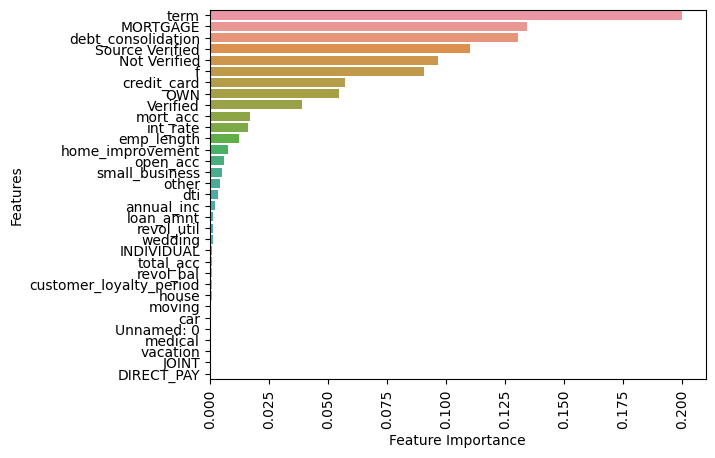

In [92]:
fimps = list(zip(X_train.columns, xgb_best.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] !=0, fimps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(x=list(imps), y=list(feats))
ax.set_ylabel("Features")
ax.set_xlabel("Feature Importance")
ax.tick_params(axis='x', rotation=90)

Random Forest prediction on test set with best model and Condusion Matrix

In [93]:
test_metrics(xgb_best, X_test, y_test)

Test Accuracy 0.807029730480689
Test F1 score 0.15241711302461183
Test Precision score 0.5146520146520146
Test Recall score 0.08945483485873458
Test ROC AUC score 0.7137943833075724
Test Average Precision score 0.3718213900087667


Text(0.5, 1.0, 'Confusion Matrix of the XGBoost Model')

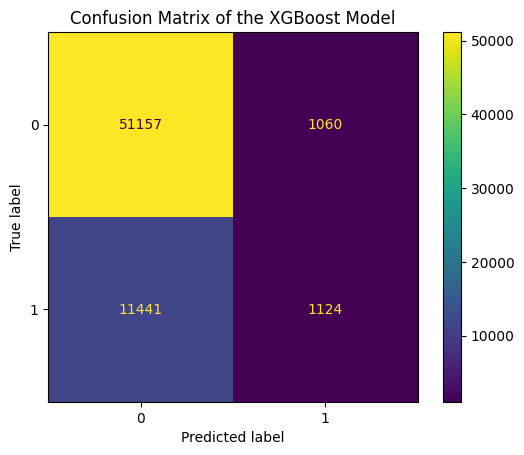

In [94]:
ConfusionMatrixDisplay.from_estimator(xgb_best, X_test, y_test)
plt.title('Confusion Matrix of the XGBoost Model')